In [1]:
import os
import pandas as pd
import numpy as py
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft

In [2]:
folder = os.getcwd() +r"/Data Files"
odata = pd.read_csv(folder +r"/COVID19 Hackathon Dataset.csv")
odata.head(5)

,Date,Continent,Countries,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,...,Diabetes Prevelance % of Population 20-79,Labour Force Total,Population,Population Aged 65 and above % of Total,Urban Population,Death Rate Per 1000 (2017),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)",Hospital Beds Year,Hospital Beds Per 1000 People
0,2019-12-31,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
1,2020-01-01,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
2,2020-01-02,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
3,2020-01-03,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
4,2020-01-04,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5


In [3]:
pop = odata[['Countries','Population']].groupby('Countries')['Population'].max().reset_index()
pop.to_csv(folder + r'/pop.csv',index=False)

In [4]:
odata.describe()

,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,Fertility_Rate,GDP_PPP,Corruption,...,Diabetes Prevelance % of Population 20-79,Labour Force Total,Population,Population Aged 65 and above % of Total,Urban Population,Death Rate Per 1000 (2017),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)",Hospital Beds Year,Hospital Beds Per 1000 People
count,41506.000000,41506.000000,4.150600e+04,41506.000000,40840.000000,40840.000000,41782.000000,40397.000000,41570.000000,41011.000000,...,40209.000000,3.898800e+04,4.000900e+04,39596.000000,4.000900e+04,39796.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,861.190430,25.197393,6.416093e+04,2497.838457,5974.403844,176.669956,404.073928,2.561276,21688.276305,-0.003089,...,7.666214,2.318639e+07,4.991501e+07,9.577075,2.800517e+07,7.741435,28.110566,87.504096,2012.472034,2.925681
std,4912.421116,134.616653,3.797422e+05,12420.394436,33641.343934,868.522808,2255.075253,1.197593,21277.864357,1.036510,...,3.862255,8.020215e+07,1.675493e+08,6.643959,8.612454e+07,2.770453,19.864664,28.563140,2.367630,2.388715
min,-8261.000000,-1918.000000,0.000000e+00,0.000000,-3864.000000,-1625.000000,2.110000,1.230000,628.000000,-1.800085,...,1.000000,5.667600e+04,7.180800e+04,1.156549,2.380000e+04,1.169000,5.861331,0.000000,2004.000000,0.100000
25%,0.000000,0.000000,1.070000e+02,1.000000,11.000000,0.000000,36.200000,1.710000,5020.000000,-0.790734,...,5.100000,2.032911e+06,3.301000e+06,3.544727,2.186104e+06,5.845000,14.611340,96.370659,2011.000000,1.200000
50%,19.000000,0.000000,1.786500e+03,35.000000,172.000000,2.000000,92.600000,2.010000,14100.000000,-0.216403,...,6.600000,5.036882e+06,1.066971e+07,7.300455,6.084994e+06,7.277000,22.196055,100.000000,2013.000000,2.300000
75%,232.000000,4.000000,1.670800e+04,339.000000,1680.250000,29.000000,223.000000,3.120000,33500.000000,0.639966,...,9.600000,1.555595e+07,3.647177e+07,15.200841,2.184476e+07,9.498000,37.926503,100.000000,2014.000000,4.000000
max,97894.000000,4928.000000,7.501612e+06,210909.000000,652390.000000,19006.000000,26300.000000,7.000000,116000.000000,2.212430,...,22.100000,7.810746e+08,1.397715e+09,28.002049,8.429340e+08,15.500000,99.734374,100.000000,2015.000000,13.400000


In [5]:
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41782 entries, 0 to 41781
Data columns (total 37 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Date                                                                                                 41782 non-null  object 
 1   Continent                                                                                            41782 non-null  object 
 2   Countries                                                                                            41782 non-null  object 
 3   New_Cases                                                                                            41506 non-null  float64
 4   New_Deaths                                                                                           41506

In [6]:
for col in odata.columns:
    print(col, len(set(odata[col])))
# float values are coming back weird

Date 282
Continent 6
Countries 180
New_Cases 4344
New_Deaths 1169
Total_Cases 17922
Total_Deaths 6248
Weekly_Cases 9951
Weekly_Deaths 3089
Population_Density 165
Fertility_Rate 1519
GDP_PPP 379
Corruption 948
Government_Effectiveness 947
Political_Stability 386
Rule_of_Law 948
Government_Healthcare_Spend 2219
Urban_Population 13415
Smoking_Prevalence 8937
Tourism 7358
Women_In_Parliament 794
Obesity_Rate 1121
RunTot_New_Cases 17646
RunTot_New_Deaths 5972
Country 174
Country Code 174
Year 1574
Diabetes Prevelance % of Population 20-79 1656
Labour Force Total 2961
Population 1945
Population Aged 65 and above % of Total 2356
Urban Population 1945
Death Rate Per 1000 (2017) 2147
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017) 1746
PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017) 1633
Hospital Beds Year 1585
Hospital Beds Per 1000 People 1638


# Countries missing additional data

In [7]:
# Countries missing additional data
set(odata[(odata['Countries']!=odata['Country'])]['Countries'])

{'Liechtenstein',
 'Monaco',
 'Palestine',
 'Papua New Guinea',
 'San Marino',
 'South Sudan',
 'St. Kitts and Nevis'}

# Clean data

In [8]:
data = odata.copy()
data = data\
        .drop(columns={'Country','Country Code',})\
        .rename(columns={'Countries':'Country'})
data[['Year']]
list(data)

['Date',
 'Continent',
 'Country',
 'New_Cases',
 'New_Deaths',
 'Total_Cases',
 'Total_Deaths',
 'Weekly_Cases',
 'Weekly_Deaths',
 'Population_Density',
 'Fertility_Rate',
 'GDP_PPP',
 'Corruption',
 'Government_Effectiveness',
 'Political_Stability',
 'Rule_of_Law',
 'Government_Healthcare_Spend',
 'Urban_Population',
 'Smoking_Prevalence',
 'Tourism',
 'Women_In_Parliament',
 'Obesity_Rate',
 'RunTot_New_Cases',
 'RunTot_New_Deaths',
 'Year',
 'Diabetes Prevelance % of Population 20-79',
 'Labour Force Total',
 'Population',
 'Population Aged 65 and above % of Total',
 'Urban Population',
 'Death Rate Per 1000 (2017)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)',
 'Hospital Beds Year',
 'Hospital Beds Per 1000 People']

# Hospital beds

,Country,Year,Hospital Beds Per 1000 People
0,Afghanistan,2015,0.5
282,Albania,2013,2.9
495,Algeria,2015,1.9
777,Andorra,2009,2.5
991,Angola,2005,0.8
...,...,...,...
40708,Venezuela,2014,0.8
40915,Vietnam,2014,2.6
41197,Yemen,2014,0.7
41378,Zambia,2010,2.0


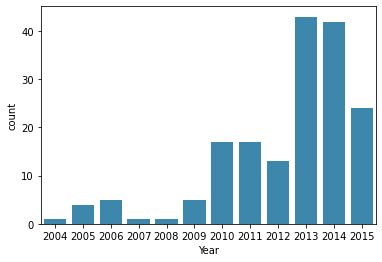

In [9]:
# Hospital Beds
hosp = data[['Country','Hospital Beds Year','Hospital Beds Per 1000 People']]
hosp = hosp\
        .drop_duplicates()\
        .rename(columns = {'Hospital Beds Year':'Year'})\
        .dropna()
hosp['Year'] = hosp['Year'].astype(int)
hosp = hosp.sort_values(by=['Country','Year'], ascending=True)
display(hosp)
sns.countplot(data=hosp, x='Year', color='#2b8cbe')

# Unique country values = 173. No repeating years for countries.
len(set(hosp['Country']))

hosp.to_csv(folder + r'/hospitalbeds.csv',index=False)

# Covid data

In [10]:
# Subset of Covid data only
covid = data[['Date','Country'\
              ,'New_Cases','New_Deaths'\
              ,'Total_Cases','Total_Deaths'\
              ,'Weekly_Cases','Weekly_Deaths'\
              ,'RunTot_New_Cases','RunTot_New_Deaths']]
print(len(covid))

# Removed duplicates and rows where cases hadn't started recording yet (new=0)
covid = covid\
        .drop_duplicates()\
        .sort_values(by=['Country','Date'], ascending=True)
covid.drop(covid[covid['Total_Cases']==0].index, inplace=True)
display(covid)

covid.to_csv(folder + r'/covid.csv',index=False)

41782


,Date,Country,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,RunTot_New_Cases,RunTot_New_Deaths
56,2020-02-25,Afghanistan,1.0,0.0,1.0,0.0,1.0,0.0,1,0
57,2020-02-26,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1,0
58,2020-02-27,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1,0
59,2020-02-28,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1,0
60,2020-02-29,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
41777,2020-10-03,Zimbabwe,8.0,0.0,7858.0,228.0,71.0,1.0,7858,228
41778,2020-10-04,Zimbabwe,27.0,0.0,7885.0,228.0,82.0,1.0,7885,228
41779,2020-10-05,Zimbabwe,0.0,0.0,7885.0,228.0,73.0,1.0,7885,228
41780,2020-10-06,Zimbabwe,13.0,0.0,7898.0,228.0,82.0,0.0,7898,228


In [11]:
covid['Date'].max()

'2020-10-07'

In [12]:
# Total Deats = Running Total Deaths, but there are some nulls in Total Deaths which are appropriately considered in Running Total Deaths
covid[(covid['Total_Deaths'] != covid['RunTot_New_Deaths']) & (covid['Total_Deaths'].notnull())]


,Date,Country,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,RunTot_New_Cases,RunTot_New_Deaths


# Borders data

In [16]:
borders = pd.read_csv(folder + r'/GEODATASOURCE-COUNTRY-BORDERS.CSV')
borders.head(5)

borderscovid = borders[['country_name','country_border_name']]

replacecountries_dict = {
'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
'United States of America':'United States',
'Viet Nam':'Vietnam',
'Tanzania (the United Republic of)':'Tanzania',
'Iran (Islamic Republic of)':'Iran',
'Palestine, State of':'Palestine',
"Korea (Democratic People's Republic of)":'South Korea',
'Brunei Darussalam':'Brunei',
'Moldova (the Republic of)':'Moldova',
'Gambia (the)':'Gambia',
'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines',
'Saint Kitts and Nevis':'St. Kitts and Nevis',
'Saint Lucia':'St. Lucia',
"Lao People's Democratic Republic":'Lao',
'Syrian Arab Republic':'Syria',
'Russian Federation':'Russia',
'Venezuela (Bolivarian Republic of)':'Venezuela',
'Bolivia (Plurinational State Of)':'Bolivia',
'Congo (the Democratic Republic of the)':'Congo, Dem. Rep.',
'Congo':'Congo, Rep.',
'Czechia':'Czech Republic',
'Slovakia':'Slovak Republic',
'Kyrgyzstan':'Kyrgyz Republic',
'Eswatini':'Swaziland',
'Cote d’Ivoire':"Cote d'Ivoire",
'Cabo Verde':'Cape Verde'
}


borderscovid.replace({'country_name':replacecountries_dict}, inplace = True)
borderscovid.replace({'country_border_name':replacecountries_dict}, inplace = True)

countrylist = set(borderscovid['country_name'])

borderscovid = borderscovid.append(\
                pd.DataFrame(\
                    list(zip(countrylist, countrylist)),\
                    columns = ['country_name','country_border_name'])\
                    )
borderscovid = borderscovid\
                .merge(supp[['Country', 'Population',\
                            'Total Covid Cases','Total Covid Deaths',\
                            'Covid Cases per Pop. 1000', 'Covid Deaths per Pop. 1000']],\
                        how='left', left_on='country_border_name', right_on='Country')\
                .drop(columns={'country_border_name'})\
                .rename(columns={'country_name':'Target Country'})\
                .sort_values(by=['Target Country','Country'], ascending = True)\
                .dropna(subset={'Country'})


borderscovid['Itself'] = borderscovid['Target Country']==borderscovid['Country']


display(borderscovid)
borderscovid.to_csv(folder + r'/covidborders.csv',index=False)

,Target Country,Country,Population,Total Covid Cases,Total Covid Deaths,Covid Cases per Pop. 1000,Covid Deaths per Pop. 1000,Itself
748,Afghanistan,Afghanistan,3.804175e+07,39548.0,1469.0,1.039595,0.038615,True
4,Afghanistan,China,1.397715e+09,90667.0,4739.0,0.064868,0.003391,False
5,Afghanistan,Iran,8.291391e+07,479825.0,27419.0,5.787027,0.330692,False
6,Afghanistan,Pakistan,2.165653e+08,316351.0,6535.0,1.460765,0.030176,False
7,Afghanistan,Tajikistan,9.321018e+06,10014.0,78.0,1.074346,0.008368,False
...,...,...,...,...,...,...,...,...
724,Zimbabwe,Botswana,2.303697e+06,3172.0,16.0,1.376917,0.006945,False
725,Zimbabwe,Mozambique,3.036604e+07,9398.0,67.0,0.309491,0.002206,False
726,Zimbabwe,South Africa,5.855827e+07,683242.0,17103.0,11.667729,0.292068,False
727,Zimbabwe,Zambia,1.786103e+07,15170.0,334.0,0.849335,0.018700,False


In [17]:
tc_withself = borderscovid[borderscovid['Itself'] == True]['Target Country'].tolist()

for c in countrylist:
    if c not in tc_withself:
        print (c)

Jersey
Guam
Gibraltar
South Georgia and the South Sandwich Islands
Saint Helena,"Ascension and Tristan da Cunha
Mayotte
Bermuda
Saint Martin (French part)
Heard Island and McDonald Islands
Saint Barthelemy
Solomon Islands
Montserrat
Nauru
Korea (the Republic of)
Martinique
Tokelau
Antarctica
Vanuatu
Niue
French Southern Territories
Timor-Leste
Guernsey
Reunion
Falkland Islands (Malvinas)
Wallis and Futuna
Faroe Islands
Curacao
Palau
Christmas Island
Northern Mariana Islands
Aland Islands
Cook Islands
Macao
Turkmenistan
French Polynesia
Bouvet Island
Western Sahara
Cayman Islands
Saint Pierre and Miquelon
Kiribati
Tonga
French Guiana
American Samoa
Guadeloupe
Micronesia (Federated States of)
Greenland
Marshall Islands
Pitcairn
Norfolk Island
Puerto Rico
Anguilla
New Caledonia
Tuvalu
Aruba
Samoa
Virgin Islands (British)
British Indian Ocean Territory
Taiwan (Province of China)
Bonaire, Sint Eustatius and Saba
Turks and Caicos Islands
Sint Maarten (Dutch part)
Cocos (Keeling) Islands
Isle

In [18]:
for c in supp['Country']:
    if c not in countrylist:
        print (c)

# International Aviation Passenger KM

In [19]:
passengerskm = pd.read_csv(folder + r'/passenger-km-international-aviation.CSV')
passengerskm.head(5)


,Entity,Code,International RPKs (billions)
0,Afghanistan,AFG,1.474968
1,Algeria,DZA,7.796012
2,Angola,AGO,3.835496
3,Argentina,ARG,31.561979
4,Australia,AUS,144.204258


# Country data

In [20]:
# Subset of country data only
supp = data[data.columns[~data.columns.isin(['Hospital Beds Year','Hospital Beds Per 1000 People'\
              ,'Date'\
              ,'New_Cases','New_Deaths'\
              ,'Total_Cases','Total_Deaths'\
              ,'Weekly_Cases','Weekly_Deaths'\
              ,'RunTot_New_Cases','RunTot_New_Deaths'])]]

# Removed duplicates
supp = supp\
        .drop_duplicates()\
        .sort_values(by=['Country','Year'], ascending=True)\
        .rename(columns={'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)':'PM2.5 mean annual exposure',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)':'PM2.5 population exposed exceeding levels'})

# Added total covid cases and deaths to date
supp = supp.merge(\
        covid.groupby('Country')['RunTot_New_Cases','RunTot_New_Deaths']\
        .max()\
        .reset_index()\
        .rename(columns={'RunTot_New_Cases':'Total Covid Cases',\
                'RunTot_New_Deaths':'Total Covid Deaths'})\
        ,how='left', left_on='Country', right_on='Country')

# Added cases/population and deaths/popylation
supp['Covid Cases per Pop. 1000'] = (supp['Total Covid Cases']/supp['Population'])*1000
supp['Covid Deaths per Pop. 1000'] = (supp['Total Covid Deaths']/supp['Population'])*1000

# Added number of bordering countries
supp = supp.merge(\
        borders.groupby('country_name')['country_border_name']\
        .count()\
        .reset_index()\
        .rename(columns={'country_border_name':'Land Border Countries'\
                ,'country_name':'Country'})\
        ,how='left',left_on='Country', right_on='Country')

# Added passengerkm
supp = supp \
        .merge(passengerskm, how='left', left_on='Country', right_on='Entity') \
        .rename(columns={'International RPKs (billions)':'Passengerkm'}) \
        .drop(columns={'Entity','Code'})

display(supp)

supp.to_csv(folder + r'/countries.csv',index=False)

,Continent,Country,Population_Density,Fertility_Rate,GDP_PPP,Corruption,Government_Effectiveness,Political_Stability,Rule_of_Law,Government_Healthcare_Spend,...,Urban Population,Death Rate Per 1000 (2017),PM2.5 mean annual exposure,PM2.5 population exposed exceeding levels,Total Covid Cases,Total Covid Deaths,Covid Cases per Pop. 1000,Covid Deaths per Pop. 1000,Land Border Countries,Passengerkm
0,Asia,Afghanistan,59.6,4.04,1800.0,-1.496648,-1.457285,-2.746730,-1.668478,0.050958,...,9797273.0,6.575,56.910808,100.000000,39548,1469,1.039595,0.038615,6.0,1.474968
1,Europe,Albania,105.0,1.70,13200.0,-0.521867,0.114788,0.382100,-0.392243,NaN,...,1747593.0,7.714,18.200603,100.000000,14568,403,5.104073,0.141196,4.0,NaN
2,Africa,Algeria,18.4,2.54,14000.0,-0.636465,-0.443925,-0.793785,-0.775309,0.659547,...,31510100.0,4.717,38.884011,100.000000,52399,1773,1.217080,0.041182,7.0,7.796012
3,Europe,Andorra,164.0,NaN,55000.0,1.238614,1.944976,1.425432,1.607738,0.490320,...,67873.0,NaN,10.307621,17.824459,2370,53,30.722564,0.687045,2.0,NaN
4,Africa,Angola,26.4,5.41,5440.0,-1.144541,-1.052086,-0.319035,-1.048023,0.462786,...,21061025.0,8.432,32.388505,100.000000,5725,211,0.179888,0.006630,4.0,3.835496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,South America,Venezuela,32.2,2.23,9050.0,-1.467512,-1.581517,-1.343512,-2.338622,0.159387,...,25162368.0,6.814,17.008554,99.933662,79796,665,2.798305,0.023320,NaN,3.288998
176,Asia,Vietnam,314.0,1.94,7350.0,-0.485357,-0.003445,0.203266,-0.003282,0.486229,...,35332140.0,6.253,29.626728,100.000000,1098,35,0.011383,0.000363,NaN,42.929130
177,Asia,Yemen,56.5,3.61,2330.0,-1.637971,-2.244354,-3.002496,-1.790394,NaN,...,10869523.0,5.978,50.456007,100.000000,2045,593,0.070126,0.020335,2.0,NaN
178,Africa,Zambia,24.7,4.76,3650.0,-0.656137,-0.559209,0.141994,-0.344939,0.386330,...,7871713.0,6.633,27.438035,100.000000,15170,334,0.849335,0.018700,8.0,NaN


# Profiling Report

In [21]:
%%script false --no-raise-error
profile = ProfileReport(supp, title='Country Profiling Report', explorative=True)
profile.to_file("country_profiling_report.html")

# Age standardised mortality rates UK

In [22]:
%%script false --no-raise-error

age = pd.read_excel(folder + r"/Age standardised mortality rates UK.xlsx")
#age.shape
#age.head(5)
age_unpivot = pd.melt(age, id_vars='Country')
age_unpivot = age_unpivot.rename(columns={'variable':'Date','value':'Age'})
display(age_unpivot)

age_unpivot.to_csv(folder + r'/Age standardised mortality rates UK_unpivot.csv',index=False)


# Unpivot all original data

In [23]:
%%script false --no-raise-error
# Unpivot data
datau = data.copy()
datau = datau.reset_index()
unpivot = pd.melt(datau, id_vars='index')
display(unpivot)
unpivot.to_csv(folder + r'/data unpivot.csv',index=False)

# Events Data

In [26]:
stay_at_home_covid_dict = { 
    0: 'Stay at home [0]: no measures', 
    1: 'Stay at home [1]: recommended', 
    2: 'Stay at home [2]: required with exception', 
    3: 'Stay at home [3]: required with minimal exception' 
}

workplace_closures_covid_dict = { 
    0: 'Workplace closure [0]: no measures', 
    1: 'Workplace closure [1]: recommended closing (or work from home)', 
    2: 'Workplace closure [2]: required closing for some', 
    3: 'Workplace closure [3]: required closing for all but essential sectors', 
}

public_events_covid_dict = { 
    0: 'Public events [0]: no measures', 
    1: 'Public events [1]: recommended cancellation', 
    2: 'Public events [2]: required cancellation', 
}

school_closures_covid_dict = { 
    0: 'School closure [0]: no measures', 
    1: 'School closure [1]: recommended closing', 
    2: 'School closure [2]: required closing for some', 
    3: 'School closure [3]: required closing for all', 
}

public_transport_covid_dict = { 
    0: 'Public transport [0]: no measures', 
    1: 'Public transport [1]: recommended closure or volume reduction', 
    2: 'Public transport [2]: required closure', 
}

public_campaigns_covid_dict = { 
    0: 'Public campaign [0]: no measures', 
    1: 'Public campaign [1]: public officials urging caution', 
    2: 'Public campaign [2]: coordinated public information campaign', 
}

public_gathering_rules_covid_dict ={
    0: 'Public gatherings [0]: no measures', 
    1: 'Public gatherings [1]: restrictions above 1000 people', 
    2: 'Public gatherings [2]: restrictions between 100-1000 people', 
    3: 'Public gatherings [3]: restrictions between 10-100 people', 
    4: 'Public gatherings [4]: restrictions less than 10 people', 
}

internal_movement_covid_dict = { 
    0: 'Internal movement [0]: no measures', 
    1: 'Internal movement [1]: recommended refrain', 
    2: 'Internal movement [2]: required restriction', 
}

international_travel_covid_dict ={
    0: 'International travel [0]: no measures', 
    1: 'International travel [1]: screening', 
    2: 'International travel [2]: quarantine arrivals from high-risk regions', 
    3: 'International travel [3]: ban on high-risk regions', 
    4: 'International travel [4]: total border closure', 
}

covid_contact_tracing_dict ={
    0: 'Contact tracing [0]: no contact tracing', 
    1: 'International travel [1]: for some cases', 
    2: 'International travel [2]: for all cases', 
}


In [28]:
# Dynamic loading and consolidation of multiple datasets
eventsdatafolder = "/LockdownEvents_Datasets/"

# Dynamically load data from filenames
dfnames = []
for dirname, _, filenames in os.walk(folder + eventsdatafolder):
    for filename in filenames:
        dfname = filename.split('.')[0].replace('-','_')
        print(filename, dfname)
        file_ext = filename.split('.')[1]
        if file_ext == 'csv':
            globals()[dfname] = pd.read_csv(folder + eventsdatafolder + filename)
            dfnames.append(dfname)
        ''' elif file_ext == 'xlsx':
            globals()[dfname] = pd.read_excel(folder + eventsdatafolder + filename)
            dfnames.append(dfname)
        '''

# Initialise Events dataframe
events = pd.DataFrame()

# for each dataset (dataframe), rename, identify change points, drop unused columns, replace event labels and append to Events dataframe
for df in dfnames:
    globals()[df] = globals()[df].rename(columns={\
                        globals()[df].columns[3]:'Event Level',\
                        'Entity':'Country'})
    globals()[df]['Match'] = globals()[df]['Event Level'] == globals()[df]['Event Level'].shift()
    globals()[df] = globals()[df].loc[~globals()[df]['Match']]
    globals()[df] = globals()[df].drop(columns={'Match','Code'})
    globals()[df]['Event'] = globals()[df]['Event Level'].map(globals()[df + '_dict'])
    globals()[df]['Event Type'] = globals()[df].apply(lambda x: \
                                    x['Event'].split(' [')[0], axis=1)
    events = events.append(globals()[df])

events = events.sort_values(by=['Country','Date','Event'], ascending = True)
display(events)

events.to_csv(folder + r'/events.csv',index=False)
        

international-travel-covid.csv international_travel_covid
public-gathering-rules-covid.csv public_gathering_rules_covid
internal-movement-covid.csv internal_movement_covid
.DS_Store 
covid-contact-tracing.csv covid_contact_tracing
OxCGRT_timeseries_all.xlsx OxCGRT_timeseries_all
public-campaigns-covid.csv public_campaigns_covid
workplace-closures-covid.csv workplace_closures_covid
stay-at-home-covid.csv stay_at_home_covid
school-closures-covid.csv school_closures_covid
public-transport-covid.csv public_transport_covid
public-events-covid.csv public_events_covid


,Country,Date,Event Level,Event,Event Type
0,Afghanistan,2020-01-01,0,Contact tracing [0]: no contact tracing,Contact tracing
0,Afghanistan,2020-01-01,0,Internal movement [0]: no measures,Internal movement
0,Afghanistan,2020-01-01,0,International travel [0]: no measures,International travel
0,Afghanistan,2020-01-01,0,Public campaign [0]: no measures,Public campaign
0,Afghanistan,2020-01-01,0,Public events [0]: no measures,Public events
...,...,...,...,...,...
53141,Zimbabwe,2020-06-05,1,Stay at home [1]: recommended,Stay at home
53120,Zimbabwe,2020-06-05,1,Workplace closure [1]: recommended closing (or...,Workplace closure
53183,Zimbabwe,2020-07-08,3,School closure [3]: required closing for all,School closure
53188,Zimbabwe,2020-07-22,2,Stay at home [2]: required with exception,Stay at home


In [29]:
timeseries = covid.append(events)
display(timeseries)

timeseries.to_csv(folder + r'/timeseries.csv',index=False)

,Date,Country,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,RunTot_New_Cases,RunTot_New_Deaths,Event Level,Event,Event Type
56,2020-02-25,Afghanistan,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
57,2020-02-26,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
58,2020-02-27,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
59,2020-02-28,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
60,2020-02-29,Afghanistan,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53141,2020-06-05,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Stay at home [1]: recommended,Stay at home
53120,2020-06-05,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Workplace closure [1]: recommended closing (or...,Workplace closure
53183,2020-07-08,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,School closure [3]: required closing for all,School closure
53188,2020-07-22,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Stay at home [2]: required with exception,Stay at home


# Analysis

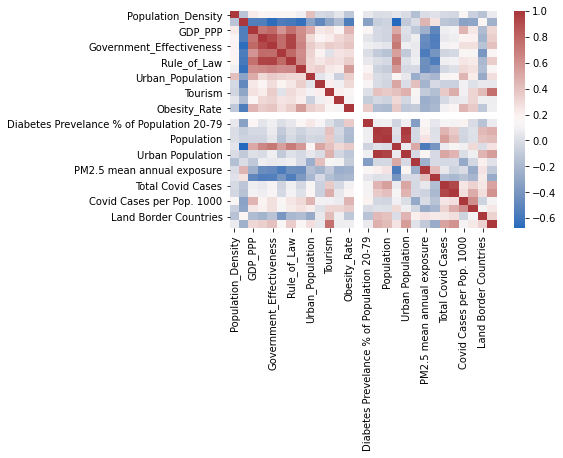

In [30]:
corrMatrix = supp.corr()
sns.heatmap(corrMatrix, annot=False, cmap="vlag")
plt.show()

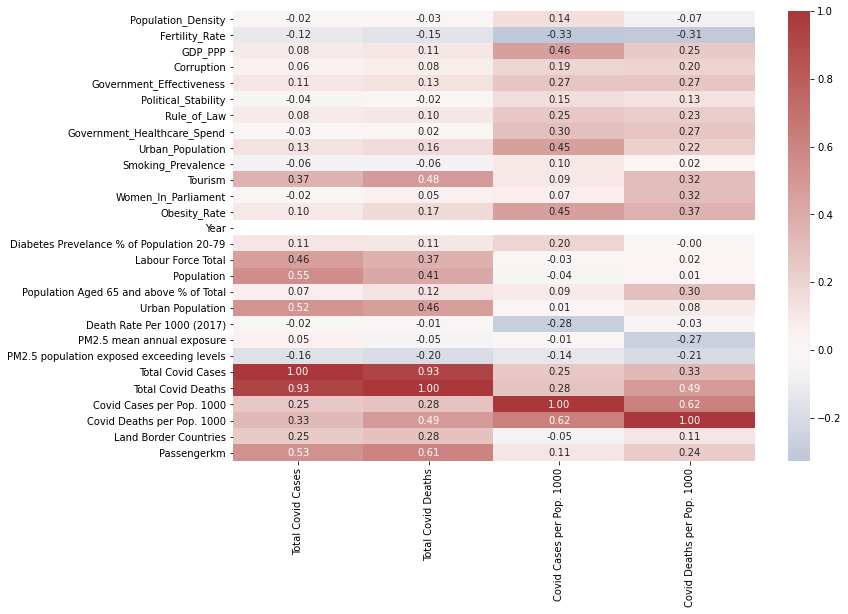

In [31]:
corrs = supp.corr(method='pearson')
corrs = corrs[['Total Covid Cases','Total Covid Deaths','Covid Cases per Pop. 1000', 'Covid Deaths per Pop. 1000']]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corrs, annot=True, fmt=".2f", cmap="vlag", center=0)
fig.show()
fig.savefig('correlations.png')

<AxesSubplot:xlabel='Population', ylabel='Total Covid Deaths'>

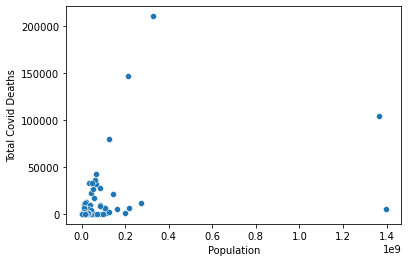

In [32]:
sns.scatterplot(data=supp, x='Population', y='Total Covid Deaths')

In [38]:
bins = 5

supp_pop = supp[['Country','Population','Population_Density','Total Covid Deaths','Total Covid Cases']]
supp_pop = supp_pop.sort_values(by='Population', ascending=False)
supp_pop = supp_pop[2:]\
            .dropna(subset=['Population'])

supp_pop['pop_bins'] = pd.qcut(supp_pop['Population'], bins, labels=False)

display(supp_pop)

supp['pop_bins'] = supp.merge(supp_pop, how='left', left_on='Country', right_on='Country')

supp.to_csv(folder + r'/countries.csv',index=False)



,Country,Population,Population_Density,Total Covid Deaths,Total Covid Cases,pop_bins
172,United States,328239523.0,36.2,210909,7501612,4
76,Indonesia,270625568.0,151.0,11374,311176,4
123,Pakistan,216565318.0,287.0,6535,316351,4
23,Brazil,211049527.0,25.4,147494,4969141,4
120,Nigeria,200963599.0,226.0,1113,59583,4
...,...,...,...,...,...,...
154,St. Vincent and the Grenadines,110589.0,284.0,0,64,0
141,Seychelles,97625.0,214.0,0,148,0
5,Antigua and Barbuda,97118.0,223.0,3,108,0
3,Andorra,77142.0,164.0,53,2370,0


NameError: name 'merge' is not defined

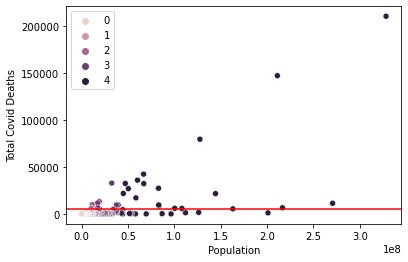

In [34]:

sns.scatterplot(data=supp_pop, x='Population', y='Total Covid Deaths', hue=supp_pop['pop_bins'].tolist())
plt.axhline(y=supp_pop['Total Covid Deaths'].mean(), color='red')


<AxesSubplot:xlabel='Population', ylabel='Density'>

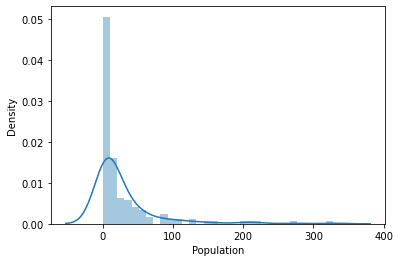

In [35]:
sns.distplot(supp_pop['Population']/1000000)

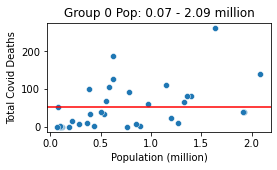

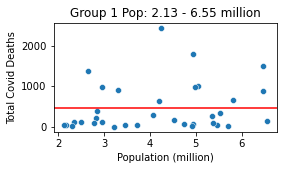

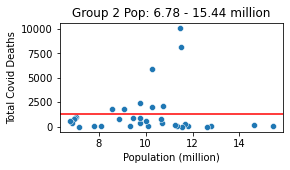

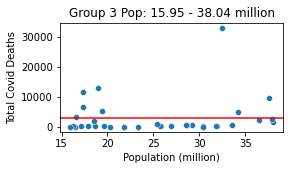

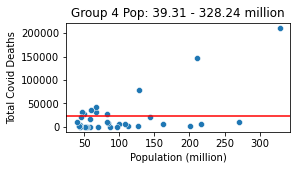

In [36]:
for i in range(0,bins):
    binset = supp_pop[supp_pop['pop_bins']==i]
    binset['Population']= binset['Population']/1000000
    binpop_min = round(binset['Population'].min(),2)
    binpop_max = round(binset['Population'].max(),2)
    ycut = round(binset['Total Covid Deaths'].mean(),2)
    plt.figure(i, figsize=(4,2))
    sns.scatterplot(data=binset, x='Population', y='Total Covid Deaths')
    plt.axhline(y=ycut, color='red')
    plt.title('Group ' + str(i) \
                + " Pop: " + str(binpop_min) \
                + " - " + str(binpop_max)
                + " million")
    plt.xlabel('Population (million)')

In [37]:
for i in range(0,10):
    binset = supp_pop[supp_pop['pop_bins']==i]
    plt.figure(i)
    corrs = .corr(method='pearson')
    corrs = corrs[['Total Covid Cases','Total Covid Deaths','Covid Cases per Pop. 1000', 'Covid Deaths per Pop. 1000']]
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.heatmap(corrs, annot=True, fmt=".2f", cmap="vlag", center=0)
    fig.show()
    plt.title('Group ' + str(i))
    plt.xlabel('Population (million)')


SyntaxError: invalid syntax (<ipython-input-37-322897e88ae6>, line 4)

# Borders Analysis

# Clustering

In [ ]:
from sklearn.preprocessing import normalize
supp2 = supp.copy().drop(columns={'Continent','Country'})
supp2 = supp2.fillna(0)
data_scaled = normalize(supp2)
data_scaled = pd.DataFrame(data_scaled, columns=supp2.columns)
data_scaled.head()

In [ ]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Total Covid Deaths'], data_scaled['Total Covid Cases'], c=cluster.labels_) 

# Feature Tools

In [ ]:
entities = {
    "supple" : (supp,'Continent',
 'Country',
 'Population_Density',
 'Fertility_Rate',
 'GDP_PPP',
 'Tourism',
 'Women_In_Parliament',
 'Obesity_Rate',
 'Year',
 'Diabetes Prevelance % of Population 20-79',
 'Labour Force Total',
 'Population',
 'Population Aged 65 and above % of Total',
 'Urban Population',
 'Death Rate Per 1000 (2017)'),
    "covid" : (covid,'Date',
 'Country',
 'New_Cases',
 'New_Deaths',
 'Total_Cases',
 'Total_Deaths',
 'Weekly_Cases',
 'Weekly_Deaths',
 'RunTot_New_Cases',
 'RunTot_New_Deaths'),
    "hospitalbeds" : (hosp, 'Country', 'Year', 'Hospital Beds Per 1000 People')
    }

In [ ]:
relationships = [("supple", "Country", "covid", "Country")]
#,("supple", "Country", "hospitalbeds", "Country")]


In [ ]:
feature_matrix_country, features_defs = ft.dfs(entities=entities,
relationships=relationships,
target_entity="Country")

feature_matrix_country